# Project D4: Predicting LoL winner

Team members - Veronika Kukk, Robin Piir, Otto Kase
<br>Github - https://github.com/VeronikaKukk/DS_project 

# Gathering data

Data was gathered from Riot API by using development API key.
<br> Code for that is written in request_info.py.
<br> This gathering method has already removed any games that were less than 10 minutes and has only taken ranked games from players with rank Diamond I in ranked solo. 

In [1]:
# everything that needs to be imported
import pandas as pd
from pathlib import Path
import seaborn as sns

# Combining data

In [2]:
# import all eune files to dataframes
df_eune1 = pd.read_csv("eune_data1.csv", index_col=0)
df_eune2 = pd.read_csv("eune_data2.csv", index_col=0)
df_eune3 = pd.read_csv("eune_data3.csv", index_col=0)
df_eune4 = pd.read_csv("eune_data4.csv", index_col=0)

In [3]:
# import all euw files to dataframes
df_euw1 = pd.read_csv("euw_data1.csv", index_col=0)
df_euw2 = pd.read_csv("euw_data2.csv", index_col=0)
df_euw3 = pd.read_csv("euw_data3.csv", index_col=0)
df_euw4 = pd.read_csv("euw_data4.csv", index_col=0)

In [4]:
df_eune1

,matchId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueEliteMonsters,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,bluewins
0,EUN1_3250387583,118,4,1,4,3,5,0,0,0,...,14267,7.0,16956,193,72,8,-2314,21.436862,1584.661722,0
1,EUN1_3250345989,15,2,0,7,3,5,0,0,0,...,13815,6.4,15507,183,48,1397,893,20.325918,1534.440213,1
2,EUN1_3250132600,13,0,0,3,2,3,0,0,0,...,14202,7.0,17682,205,48,-544,-1343,22.768502,1577.357373,0
3,EUN1_3250109344,10,1,1,3,3,0,0,0,0,...,14684,6.6,16566,194,60,-541,111,21.549689,1631.111531,1
4,EUN1_3250074417,12,0,0,0,4,0,0,0,0,...,14784,6.6,16370,203,50,-2446,-2208,22.544534,1641.863978,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,EUN1_3241781223,112,1,1,12,4,10,1,0,1,...,14534,6.4,15108,175,52,3242,2265,19.439261,1614.458367,1
4064,EUN1_3241746052,17,5,1,13,6,20,0,0,0,...,15496,6.4,16230,195,64,3805,1745,21.659246,1721.188111,1
4065,EUN1_3241710887,16,1,0,3,9,3,0,0,0,...,17167,6.6,16519,171,56,-3654,-1748,18.995111,1906.953580,1
4066,EUN1_3241682864,34,1,0,4,7,2,0,0,0,...,14538,6.4,14915,171,36,568,1714,18.995181,1614.923621,0


In [5]:
# combining all of the dataframes of both servers into one
eune_dfs = [df_eune1, df_eune2, df_eune3, df_eune4]
euw_dfs = [df_euw1, df_euw2, df_euw3, df_euw4]

df_eune = pd.concat(eune_dfs, ignore_index=True)
df_euw = pd.concat(euw_dfs, ignore_index=True)

In [6]:
df_eune

,matchId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueEliteMonsters,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,bluewins
0,EUN1_3250387583,118,4,1,4,3,5,0,0,0,...,14267,7.0,16956,193,72,8,-2314,21.436862,1584.661722,0
1,EUN1_3250345989,15,2,0,7,3,5,0,0,0,...,13815,6.4,15507,183,48,1397,893,20.325918,1534.440213,1
2,EUN1_3250132600,13,0,0,3,2,3,0,0,0,...,14202,7.0,17682,205,48,-544,-1343,22.768502,1577.357373,0
3,EUN1_3250109344,10,1,1,3,3,0,0,0,0,...,14684,6.6,16566,194,60,-541,111,21.549689,1631.111531,1
4,EUN1_3250074417,12,0,0,0,4,0,0,0,0,...,14784,6.6,16370,203,50,-2446,-2208,22.544534,1641.863978,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16246,EUN1_3245368080,75,4,1,6,6,8,0,0,0,...,15542,6.6,16303,194,56,-509,-1744,21.549649,1726.415723,1
16247,EUN1_3245264423,9,3,0,1,6,1,0,0,0,...,14910,6.4,16199,185,40,-1725,-1144,20.548097,1656.065576,0
16248,EUN1_3245007949,14,0,0,4,7,5,0,0,0,...,14705,6.6,16327,164,56,-501,-496,18.216353,1633.362583,1
16249,EUN1_3244978461,11,1,0,0,9,0,0,0,0,...,15390,6.2,15396,169,44,-2950,-967,18.771764,1709.452342,0


# Cleaning data

In [7]:
# Find whether any games have no values
eune_nan = df_eune.isna().any(axis=1).sum()
euw_nan = df_euw.isna().any(axis=1).sum()
print("Number of missing values in EUNE: "+str(eune_nan))
print("Number of missing values in EUW: "+str(euw_nan))

Number of missing values in EUNE: 0
Number of missing values in EUW: 0


This means that there are no rows with missing values. No need to remove any rows.

### Inspecting the mean, min and max

In [8]:
# Since we want to see all columns, we set the max_columns to None
pd.set_option('display.max_columns', None)
df_eune.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,bluewins
count,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000,16251.000000
mean,18.836133,2.004800,0.507353,5.689373,5.608455,5.698542,0.231309,0.063319,0.294628,0.005723,15048.074765,6.424122,15819.147745,184.409267,49.018276,-25.933727,9.856624,20.483711,1671.511804,20.082580,1.858163,0.492339,5.608455,5.689373,5.600886,0.250200,0.052181,0.302381,0.003631,15022.141037,6.427518,15829.004369,184.466925,49.935758,25.933727,-9.856624,20.490175,1668.638380,0.497692
std,20.162360,1.893432,0.499961,2.754621,2.726233,3.655421,0.421682,0.243544,0.482896,0.090967,1392.833911,0.276308,984.021891,19.627546,8.725882,2123.597085,1514.104666,2.179396,154.572394,23.552415,1.802871,0.499957,2.726233,2.754621,3.638016,0.433141,0.222400,0.489024,0.060146,1390.165646,0.278078,989.563015,19.663797,8.792196,2123.597085,1514.104666,2.183397,154.298370,0.500010
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4721.000000,2.200000,2800.000000,24.000000,0.000000,-12993.000000,-10601.000000,4.239596,833.963875,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5926.000000,2.800000,4065.000000,32.000000,0.000000,-8473.000000,-9779.000000,5.220192,873.438107,0.000000
25%,11.000000,1.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,14083.000000,6.200000,15193.000000,172.000000,44.000000,-1427.000000,-976.000000,19.104637,1564.413259,11.000000,1.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,14031.000000,6.200000,15207.000000,172.000000,44.000000,-1391.500000,-997.500000,19.104389,1558.544699,0.000000
50%,13.000000,2.000000,1.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,14952.000000,6.400000,15836.000000,185.000000,48.000000,-29.000000,-1.000000,20.549086,1660.798187,13.000000,2.000000,0.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,14923.000000,6.400000,15848.000000,185.000000,49.000000,29.000000,1.000000,20.549999,1657.582535,0.000000
75%,16.000000,3.000000,1.000000,7.000000,7.000000,8.000000,0.000000,0.000000,1.000000,0.000000,15906.000000,6.600000,16473.500000,198.000000,55.000000,1391.500000,997.500000,21.992628,1766.736371,16.000000,3.000000,1.000000,7.000000,7.000000,8.000000,1.000000,0.000000,1.000000,0.000000,15898.000000,6.600000,16478.500000,198.000000,56.000000,1427.000000,976.000000,21.993707,1765.846019,1.000000
max,306.000000,25.000000,1.000000,21.000000,23.000000,32.000000,1.000000,1.000000,2.000000,6.000000,25217.000000,7.400000,19705.000000,250.000000,84.000000,8473.000000,9779.000000,27.766209,2801.115988,341.000000,24.000000,1.000000,23.000000,21.000000,31.000000,1.000000,1.000000,2.000000,1.000000,21854.000000,7.400000,19218.000000,247.000000,84.000000,12993.000000,10601.000000,27.437636,2427.305240,1.000000


In [9]:
df_euw.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,bluewins
count,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.00000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000
mean,18.586060,2.101420,0.499656,5.650504,5.659200,5.863480,0.199087,0.101233,0.300319,0.007821,15140.575799,6.418833,15799.585497,187.651818,49.448727,18.022211,35.439029,20.843825,1681.767174,20.507039,1.971032,0.500156,5.659200,5.650504,5.955703,0.247200,0.080773,0.327973,0.005381,15158.59801,6.426666,15835.024526,188.122881,50.059939,-18.022211,-35.439029,20.896003,1683.759241,0.488081
std,19.465543,1.898543,0.500016,2.828800,2.811438,3.781927,0.399326,0.301646,0.492623,0.089501,1426.619092,0.283061,1006.155446,19.693728,9.006706,2171.882669,1524.580023,2.187890,158.491660,22.181218,1.827836,0.500016,2.811438,2.828800,3.857480,0.431398,0.272495,0.506667,0.085025,1425.33718,0.276972,984.703982,19.612040,9.084871,2171.882669,1524.580023,2.177910,158.228732,0.499874
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8787.000000,3.800000,6701.000000,40.000000,0.000000,-10075.000000,-7154.000000,4.443268,973.522798,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10722.00000,4.400000,9618.000000,96.000000,0.000000,-12288.000000,-10667.000000,10.662500,1190.870217,0.000000
25%,12.000000,1.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,14146.500000,6.200000,15174.500000,175.000000,44.000000,-1394.000000,-944.000000,19.438973,1571.242390,12.000000,1.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,14146.00000,6.200000,15222.000000,175.000000,44.000000,-1424.500000,-1007.500000,19.439459,1571.335744,0.000000
50%,13.000000,2.000000,0.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15049.000000,6.400000,15827.000000,189.000000,48.000000,15.000000,28.000000,20.990166,1671.544643,14.000000,2.000000,1.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15060.00000,6.400000,15857.000000,189.000000,49.000000,-15.000000,-28.000000,20.991720,1672.886816,0.000000
75%,16.000000,3.000000,1.000000,7.000000,7.000000,8.000000,0.000000,0.000000,1.000000,0.000000,16024.000000,6.600000,16473.000000,201.000000,56.000000,1424.500000,1007.500000,22.326718,1779.815868,17.000000,3.000000,1.000000,7.000000,7.000000,8.000000,0.000000,0.000000,1.000000,0.000000,16043.50000,6.600000,16494.500000,201.000000,56.000000,1394.000000,944.000000,22.328289,1782.072087,1.000000
max,286.000000,27.000000,1.000000,20.000000,22.000000,31.000000,1.000000,1.000000,2.000000,2.000000,22334.000000,7.400000,19501.000000,256.000000,88.000000,12288.000000,10667.000000,28.437809,2480.949101,295.000000,25.000000,1.000000,22.000000,20.000000,34.000000,1.000000,1.000000,2.000000,5.000000,24040.00000,7.400000,19906.000000,266.000000,84.000000,10075.000000,7154.000000,28.769839,2580.772955,1.000000


We found an anomaly with WardsPlaced (for both teams and both servers). It is unlikely that a team places more than ~X wards before 10 minutes, so we investigated why it is like that.
Our first thought was that it is possible that Riot counts some player abilities as wards, because those abilities give vison to the player.

In [10]:
# Finding the matchId
df_euw.loc[df_euw["blueWardsPlaced"]==286]

,matchId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,bluewins
8525,EUW1_6131485050,286,0,0,3,6,1,0,0,0,0,14055,6.6,17259,185,53,677,-738,20.548858,1561.157845,14,1,1,6,3,5,0,0,0,0,14732,6.4,16521,191,49,-677,738,21.215308,1636.355558,1


In [11]:
# Finding the matchId
df_eune.loc[df_eune["blueWardsPlaced"]==306]

,matchId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,bluewins
13825,EUN1_3249937829,306,2,1,2,6,1,0,0,0,0,13234,6.4,15712,187,42,1272,923,20.771585,1470.006165,10,14,0,6,2,3,0,0,0,0,14506,6.8,16635,180,41,-1272,-923,19.994039,1611.297372,1


We manualy searched through about 10 games that appeared in our dataset, which have more than 200 wards by either team. Riot marks most of the wards by one character (Warwick) as UNDEFINED.

In [12]:
# Finding matchId-s to check participating characters in the game
df_eune[(df_eune["blueWardsPlaced"] > 200) | (df_eune["redWardsPlaced"] > 200)]

,matchId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,bluewins
265,EUN1_3246750364,8,1,1,4,6,2,0,0,0,0,13965,6.4,15582,185,48,1268,1161,20.551750,1551.379374,209,1,0,6,4,7,1,0,1,0,15233,6.6,16743,185,48,-1268,-1161,20.551750,1692.242177,1
342,EUN1_3226042360,207,14,1,2,6,0,0,0,0,0,13474,6.4,15881,190,48,1119,696,21.103764,1496.590076,32,2,0,6,2,7,1,0,1,0,14593,6.6,16577,169,56,-1119,-696,18.771243,1620.880138,0
344,EUN1_3217937111,214,1,0,2,6,2,0,0,0,0,13838,6.4,14936,198,38,1011,485,21.994705,1537.185492,10,1,1,6,2,10,1,0,1,0,14849,6.4,15421,179,62,-1011,-485,19.884102,1649.491789,0
600,EUN1_3250239128,33,3,1,4,6,3,0,1,1,0,14305,6.4,15660,158,52,927,169,17.551395,1589.067777,244,2,0,6,4,6,1,0,1,0,15232,6.4,15829,177,60,-927,-169,19.662006,1692.043367,0
1063,EUN1_3245723176,11,2,0,5,7,6,0,0,0,0,14831,6.4,14821,205,25,668,-465,22.771537,1647.437369,252,1,1,7,5,7,0,0,0,0,15499,6.4,14356,165,32,-668,465,18.328310,1721.639254,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,EUN1_3226910291,30,0,1,8,6,18,0,0,0,0,15513,6.2,15094,164,48,-671,-804,18.217061,1723.178433,203,10,0,6,8,7,1,0,1,0,14842,5.8,14290,150,48,671,804,16.661946,1648.643995,1
15121,EUN1_3227333388,79,3,0,7,5,9,0,0,0,0,15947,6.4,16517,186,55,-1866,-2548,20.660086,1771.324689,275,3,1,5,7,8,1,0,1,0,14081,5.8,13969,157,36,1866,2548,17.438890,1564.057374,1
15403,EUN1_3181921263,11,2,1,5,2,2,1,0,1,0,14705,6.4,15995,186,55,-1065,509,20.658939,1633.277922,288,3,0,2,5,1,0,0,0,0,13640,6.6,16504,204,48,1065,-509,22.658191,1514.988838,1
15437,EUN1_3245114886,278,1,0,5,10,5,0,0,0,0,13620,6.2,14591,136,60,3784,1239,15.106160,1512.837459,12,2,1,10,5,7,0,0,0,0,17404,6.6,15830,197,40,-3784,-1239,21.881717,1933.144136,0


Since there are 162 champions in League of Legends and many of them have abilities that give vision, we decided that we will remove games from our dataset that have more than X wards placed by either team. We are aware that this could influence the machine learning algorithm, but we think that these characters skew the warding data too much so we have decided to leave out games with an unrealistic amount of wards.

In [13]:
len(df_euw[(df_euw["blueWardsPlaced"] > 50) | (df_euw["redWardsPlaced"] > 50)])

1801

In [14]:
len(df_eune[(df_eune["blueWardsPlaced"] > 50) | (df_eune["redWardsPlaced"] > 50)])

1774

In [15]:
# siia kood euwst eemaldamine, muuda 50 sobivaks nriks ja tekstis X ka
df_euw = df_euw[(df_euw["blueWardsPlaced"] <= 50) | (df_euw["redWardsPlaced"] <= 50)]

In [16]:
# siia kood eunest eemaldamine
df_eune = df_eune[(df_eune["blueWardsPlaced"] <= 50) | (df_eune["redWardsPlaced"] <= 50)]

In [17]:
print(len(df_eune))
len(df_euw)

16212


15940

The data can still include some duplicate values (games) because players from the same server and similar rank play together in ranked games.

### Removing duplicate values

We are counting unique matchId-s because each game has its own id.

In [18]:
print("EUNE game count: " + str(len(df_eune)))
print("EUNE unique game count: " +str(len(df_eune["matchId"].drop_duplicates())))

EUNE game count: 16212
EUNE unique game count: 14752


In [19]:
print("EUW game count: " + str(len(df_euw)))
print("EUW unique game count: " +str(len(df_euw["matchId"].drop_duplicates())))

EUW game count: 15940
EUW unique game count: 15189


In [20]:
df_eune = df_eune.drop_duplicates()
df_euw = df_euw.drop_duplicates()

### Balancing the dataset

It is not possible to have a tie. This means that either blue or red team has to win.

Counting how many blue wins (same as red loses) and loses (same as red wins) each server has, to determine how to balance data.

In [21]:
eune_bluewin_amount = len(df_eune[df_eune["bluewins"]==1])
eune_bluelose_amount = len(df_eune[df_eune["bluewins"]==0])
print("EUNE blue wins: ", eune_bluewin_amount)
print("EUNE blue loses (red wins): ", eune_bluelose_amount)

EUNE blue wins:  7293
EUNE blue loses (red wins):  7459


In [22]:
euw_bluewin_amount = len(df_euw[df_euw["bluewins"]==1])
euw_bluelose_amount = len(df_euw[df_euw["bluewins"]==0])
print("EUW blue wins: ", euw_bluewin_amount)
print("EUW blue loses (red wins): ", euw_bluelose_amount)

EUW blue wins:  7416
EUW blue loses (red wins):  7773


We are using random undersampling because we only want to have unique games. 

First we find minimum of winning and losing games and then the minimum out of those. This is because we want both servers to have the same amount of positive and negative outcomes. There is no need to take the wins or losses into account when comparing the servers, so this balance will not influence the comparisons.

In [23]:
bluewins_amount = min(eune_bluewin_amount,euw_bluewin_amount)
blueloses_amount = min(eune_bluelose_amount, euw_bluelose_amount)
game_amount = min(bluewins_amount,blueloses_amount)

In [24]:
# replace=False is default, this means that there will be no duplicate values
eune_bluewins = df_eune[df_eune["bluewins"]==1].sample(n=game_amount, random_state=0)
eune_blueloses = df_eune[df_eune["bluewins"]==0].sample(n=game_amount, random_state=0)
euw_bluewins = df_euw[df_euw["bluewins"]==1].sample(n=game_amount, random_state=0)
euw_blueloses = df_euw[df_euw["bluewins"]==0].sample(n=game_amount, random_state=0)

In [25]:
df_eune_balanced = pd.concat([eune_bluewins, eune_blueloses])

In [26]:
df_euw_balanced = pd.concat([euw_bluewins, euw_blueloses])

# Data after cleaning

We have removed duplicate values, removed some extreme values and balanced the data for both servers.

In [27]:
df_eune_balanced.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,bluewins
count,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000
mean,18.672837,2.008227,0.509598,5.684355,5.604758,5.698409,0.231318,0.062526,0.293843,0.006102,15042.338818,6.423776,15817.807075,184.309681,49.006445,-22.049911,14.257713,20.472654,1670.876212,19.950980,1.854861,0.490059,5.604758,5.684355,5.588098,0.247292,0.052036,0.299328,0.003634,15020.288907,6.427945,15832.064788,184.443370,49.918346,22.049911,-14.257713,20.487571,1668.435067,0.500000
std,19.922690,1.902617,0.499925,2.748325,2.718623,3.654690,0.421689,0.242116,0.481868,0.094576,1389.819916,0.276864,984.841823,19.664171,8.707447,2118.045115,1513.011193,2.183376,154.221288,23.430753,1.794169,0.499918,2.718623,2.748325,3.631456,0.431453,0.222108,0.488127,0.060172,1388.208011,0.278057,988.216577,19.705639,8.768683,2118.045115,1513.011193,2.187959,154.067868,0.500017
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4721.000000,2.200000,2800.000000,24.000000,0.000000,-12993.000000,-10601.000000,4.239596,833.963875,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5926.000000,2.800000,4065.000000,32.000000,0.000000,-8473.000000,-9779.000000,5.220192,873.438107,0.000000
25%,11.000000,1.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,14073.000000,6.200000,15193.000000,172.000000,44.000000,-1425.750000,-977.000000,19.104257,1563.117126,11.000000,1.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,14033.000000,6.200000,15210.000000,172.000000,44.000000,-1387.750000,-1001.750000,19.103832,1558.780568,0.000000
50%,13.000000,2.000000,1.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,14949.500000,6.400000,15837.000000,185.000000,48.000000,-28.500000,4.500000,20.548839,1660.550832,13.000000,2.000000,0.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,14919.500000,6.400000,15850.000000,185.000000,49.000000,28.500000,-4.500000,20.550114,1657.244091,0.500000
75%,16.000000,3.000000,1.000000,7.000000,7.000000,8.000000,0.000000,0.000000,1.000000,0.000000,15906.000000,6.600000,16473.000000,198.000000,55.000000,1387.750000,1001.750000,21.992252,1766.710926,16.000000,3.000000,1.000000,7.000000,7.000000,8.000000,0.000000,0.000000,1.000000,0.000000,15891.000000,6.600000,16481.000000,198.000000,56.000000,1425.750000,977.000000,21.993687,1765.254765,1.000000
max,306.000000,25.000000,1.000000,21.000000,23.000000,32.000000,1.000000,1.000000,2.000000,6.000000,25217.000000,7.400000,19705.000000,250.000000,84.000000,8473.000000,9779.000000,27.766209,2801.115988,341.000000,24.000000,1.000000,23.000000,21.000000,31.000000,1.000000,1.000000,2.000000,1.000000,21854.000000,7.400000,19218.000000,247.000000,84.000000,12993.000000,10601.000000,27.437636,2427.305240,1.000000


In [28]:
df_euw_balanced.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,bluewins
count,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000
mean,18.334019,2.099753,0.502674,5.685932,5.634513,5.913273,0.201906,0.100576,0.302482,0.008159,15160.179830,6.421651,15810.806253,187.810709,49.445496,-17.776224,13.574935,20.861468,1683.943830,20.286919,1.962498,0.497121,5.634513,5.685932,5.925065,0.242356,0.079734,0.322090,0.005073,15142.403606,6.424050,15824.381187,188.030920,50.013232,17.776224,-13.574935,20.885768,1681.958563,0.500000
std,18.859127,1.889034,0.500010,2.841804,2.805335,3.799548,0.401436,0.300777,0.493874,0.091470,1430.865805,0.283782,1007.762071,19.682963,9.017429,2174.555501,1524.997099,2.186733,158.966106,21.666295,1.828253,0.500009,2.805335,2.841804,3.839951,0.428523,0.270890,0.503319,0.083473,1423.119248,0.277325,984.940752,19.618405,9.078383,2174.555501,1524.997099,2.178559,157.973156,0.500017
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8787.000000,3.800000,6701.000000,40.000000,0.000000,-10075.000000,-7154.000000,4.443268,973.522798,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10722.000000,4.400000,9618.000000,96.000000,0.000000,-12288.000000,-10667.000000,10.662500,1190.870217,0.000000
25%,11.000000,1.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,14163.000000,6.200000,15184.000000,175.000000,44.000000,-1432.000000,-962.000000,19.439522,1573.193556,12.000000,1.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,14132.000000,6.200000,15210.000000,175.000000,44.000000,-1386.000000,-989.000000,19.439117,1569.797152,0.000000
50%,13.000000,2.000000,1.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15069.500000,6.400000,15843.000000,189.000000,48.000000,-16.000000,6.000000,20.992264,1673.815930,14.000000,2.000000,0.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15046.000000,6.400000,15847.000000,188.000000,49.000000,16.000000,-6.000000,20.884383,1671.256436,0.500000
75%,16.000000,3.000000,1.000000,7.000000,7.000000,8.000000,0.000000,0.000000,1.000000,0.000000,16048.000000,6.600000,16487.000000,201.000000,56.000000,1386.000000,989.000000,22.327297,1782.572213,17.000000,3.000000,1.000000,7.000000,7.000000,8.000000,0.000000,0.000000,1.000000,0.000000,16025.000000,6.600000,16480.000000,201.000000,56.000000,1432.000000,962.000000,22.327586,1779.975518,1.000000
max,286.000000,27.000000,1.000000,20.000000,22.000000,31.000000,1.000000,1.000000,2.000000,2.000000,22334.000000,7.400000,19501.000000,256.000000,88.000000,12288.000000,10667.000000,28.437809,2480.949101,295.000000,25.000000,1.000000,22.000000,20.000000,34.000000,1.000000,1.000000,2.000000,5.000000,24040.000000,7.400000,19906.000000,266.000000,84.000000,10075.000000,7154.000000,28.769839,2580.772955,1.000000


In [29]:
# write data to csv files 
filepath1 = Path('clean_eune.csv')
filepath2 = Path('clean_euw.csv')
df_eune.to_csv(filepath1)
df_euw.to_csv(filepath2)

# Correlations between game data and match result

It is likely that different servers have different playstyles. This means that we cannot combine those servers while searching for correlations. Both servers will be investigated separately.

<AxesSubplot:>

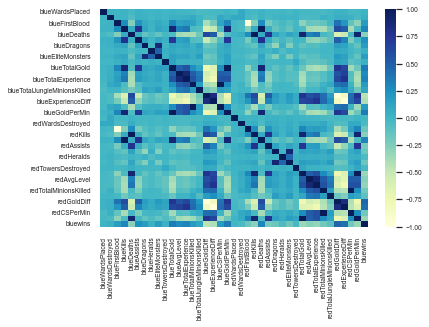

In [30]:
eune_corr_matrix = df_eune_balanced.corr()
# there are too many attributes, so the font needs to be quite small
sns.set(font_scale=0.6)
sns.heatmap(eune_corr_matrix,cmap="YlGnBu")

In [31]:
abs(eune_corr_matrix["bluewins"]).sort_values(ascending=False)

bluewins                        1.000000
blueGoldDiff                    0.459651
redGoldDiff                     0.459651
redExperienceDiff               0.410857
blueExperienceDiff              0.410857
blueGoldPerMin                  0.358467
blueTotalGold                   0.358284
redGoldPerMin                   0.343098
redTotalGold                    0.342609
blueTotalExperience             0.317043
redTotalExperience              0.313082
redDeaths                       0.299907
blueKills                       0.299907
redKills                        0.284245
blueDeaths                      0.284245
redAvgLevel                     0.276753
blueAvgLevel                    0.273092
blueAssists                     0.235829
redAssists                      0.220516
redCSPerMin                     0.193598
redTotalMinionsKilled           0.193437
blueTotalMinionsKilled          0.186035
blueCSPerMin                    0.186029
blueFirstBlood                  0.179520
redFirstBlood   

<AxesSubplot:>

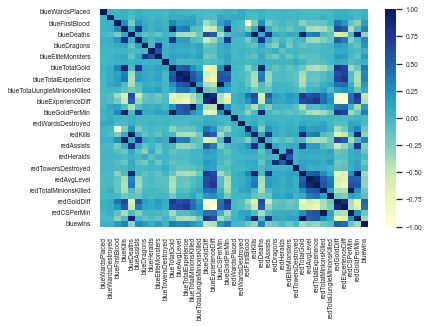

In [32]:
euw_corr_matrix = df_euw_balanced.corr()
sns.heatmap(euw_corr_matrix,cmap="YlGnBu")

In [33]:
abs(euw_corr_matrix["bluewins"]).sort_values(ascending=False)

bluewins                        1.000000
redGoldDiff                     0.475579
blueGoldDiff                    0.475579
redExperienceDiff               0.419458
blueExperienceDiff              0.419458
blueTotalGold                   0.366336
blueGoldPerMin                  0.366330
redGoldPerMin                   0.358468
redTotalGold                    0.358364
blueTotalExperience             0.327709
redTotalExperience              0.314150
redDeaths                       0.305121
blueKills                       0.305121
redKills                        0.298872
blueDeaths                      0.298872
blueAvgLevel                    0.287744
redAvgLevel                     0.273923
blueAssists                     0.258128
redAssists                      0.253233
blueTotalMinionsKilled          0.190887
blueCSPerMin                    0.190880
blueDragons                     0.183599
redTotalMinionsKilled           0.179647
redCSPerMin                     0.179595
blueEliteMonster